# 01. PyTorch Workflow Fundamentals

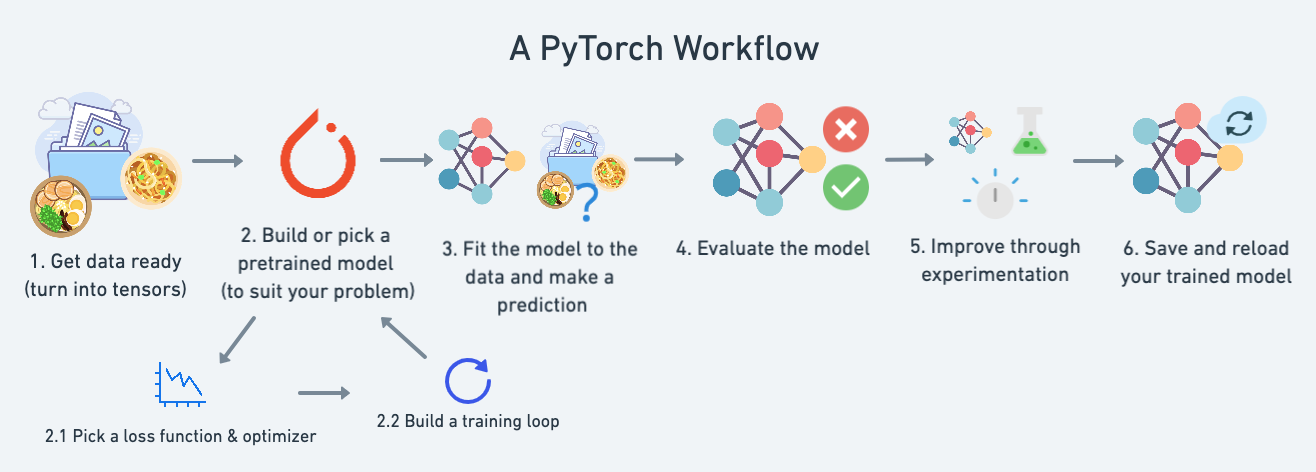

    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"

**1.data(prepare and load)**

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 

In [2]:
# Create known parameters 
weights = 0.7
bias = 0.3

#Create data
x = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = x*weights + bias

In [3]:
# Create train/test split
train_split = int(0.8 * len(x))
X_train,y_train = x[:train_split],y[:train_split]
X_test, y_test = x[train_split:],y[train_split:]

len(X_test),len(X_train),len(y_test),len(y_train)

(10, 40, 10, 40)

Function to visulize training,testing data for future use 

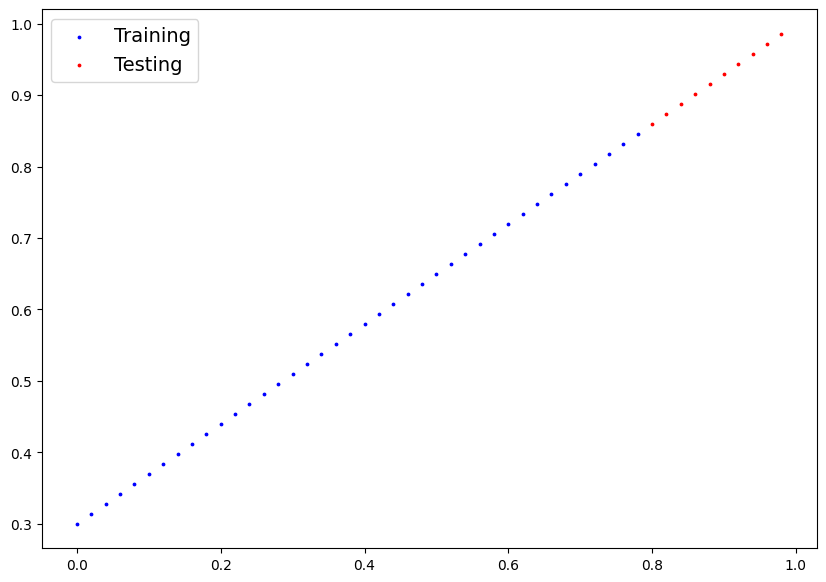

In [4]:
def plot_predictions(train_data = X_train,test_data = X_test,
                     train_labels = y_train,test_labels = y_test,
                     predictions = None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=3,label = "Training")
    plt.scatter(test_data,test_labels,c='r',s=3,label = "Testing")

    if predictions is not None:
        plt.scatter(test_data , predictions,c='r',s=3)

    plt.legend(prop = {"size":14})

plot_predictions()

**2.Build model**

In [5]:
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()

        #initialize parameters 
        self.weight = nn.Parameter(torch.rand(1,dtype = torch.float32, 
                                              requires_grad=True)) # tracking gradient 
        self.bias = nn.Parameter(torch.rand(1,dtype = torch.float32, 
                                            requires_grad=True)) # tracking gradient 
    
    # forward defines computation in a model
    def forward(self, x: torch.Tensor):
        return x * self.weight + self.bias

**PyTorch Model building essentails**

- `torch.nn` - Contains all building blocks for computational graphs.

- `torch.nn.parameter` - Stores parameters weights & biases , gredients are calculated automatically and updated.

- `torch.nn.Module` - The base class for all neural network, if your'e building a neural network in pytorch it should be a subclass of `nn.Module`.

- `torch.optim` - Contains various optimization algorithm.

- `def forward` - defines computation.

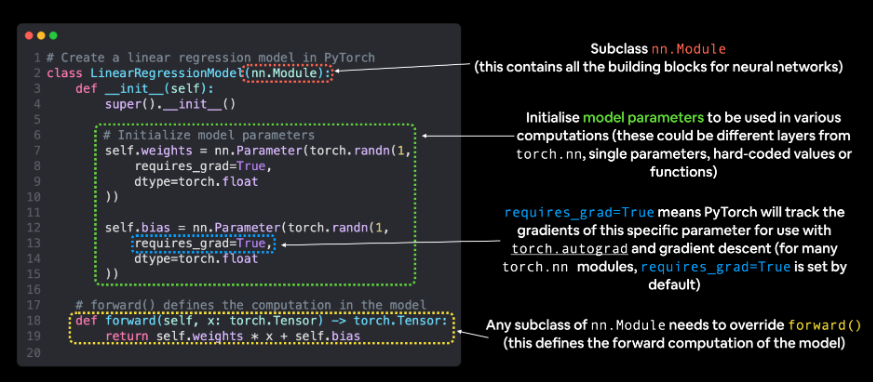

In [6]:
# Contents of a pytorch model
torch.manual_seed(12)
model_0 = Linear_Regression()
print(list(model_0.parameters()),'\n')

# we can get the state( model contents) using model.state_dict()
print(model_0.state_dict())

[Parameter containing:
tensor([0.4657], requires_grad=True), Parameter containing:
tensor([0.2328], requires_grad=True)] 

OrderedDict([('weight', tensor([0.4657])), ('bias', tensor([0.2328]))])


In [7]:
# inference with model B4 training 
with torch.inference_mode():
    y_pred = model_0(X_test)
    
print("Number of x_test samples", len(X_test))
print("Number of y_pred samples", len(y_pred))
print(y_pred)

Number of x_test samples 10
Number of y_pred samples 10
tensor([[0.6053],
        [0.6146],
        [0.6239],
        [0.6333],
        [0.6426],
        [0.6519],
        [0.6612],
        [0.6705],
        [0.6798],
        [0.6891]])


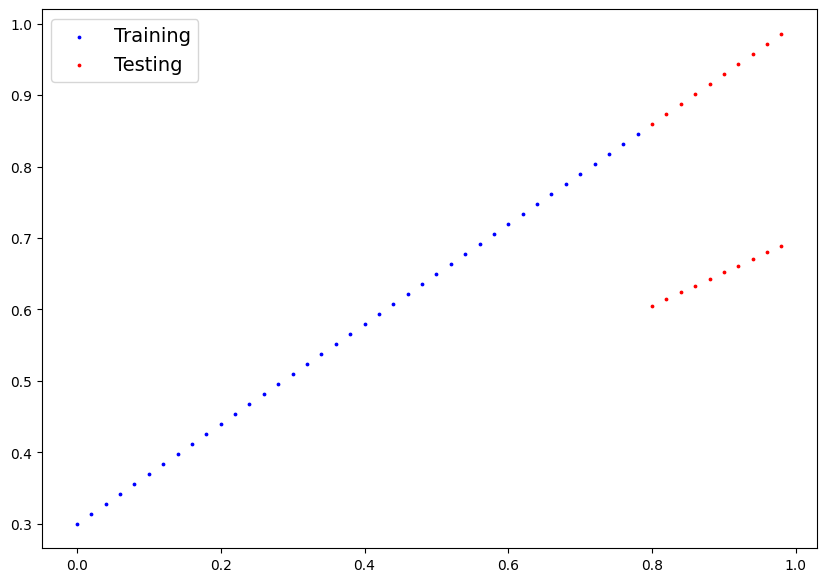

In [8]:
plot_predictions(predictions=y_pred)

**3.Train the model**

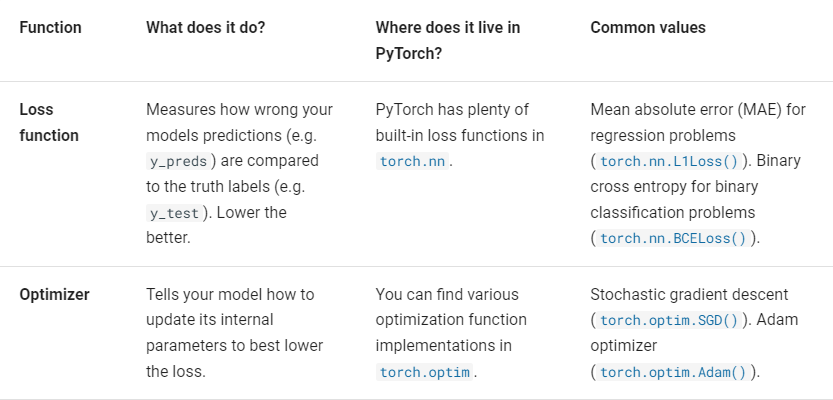

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.001)

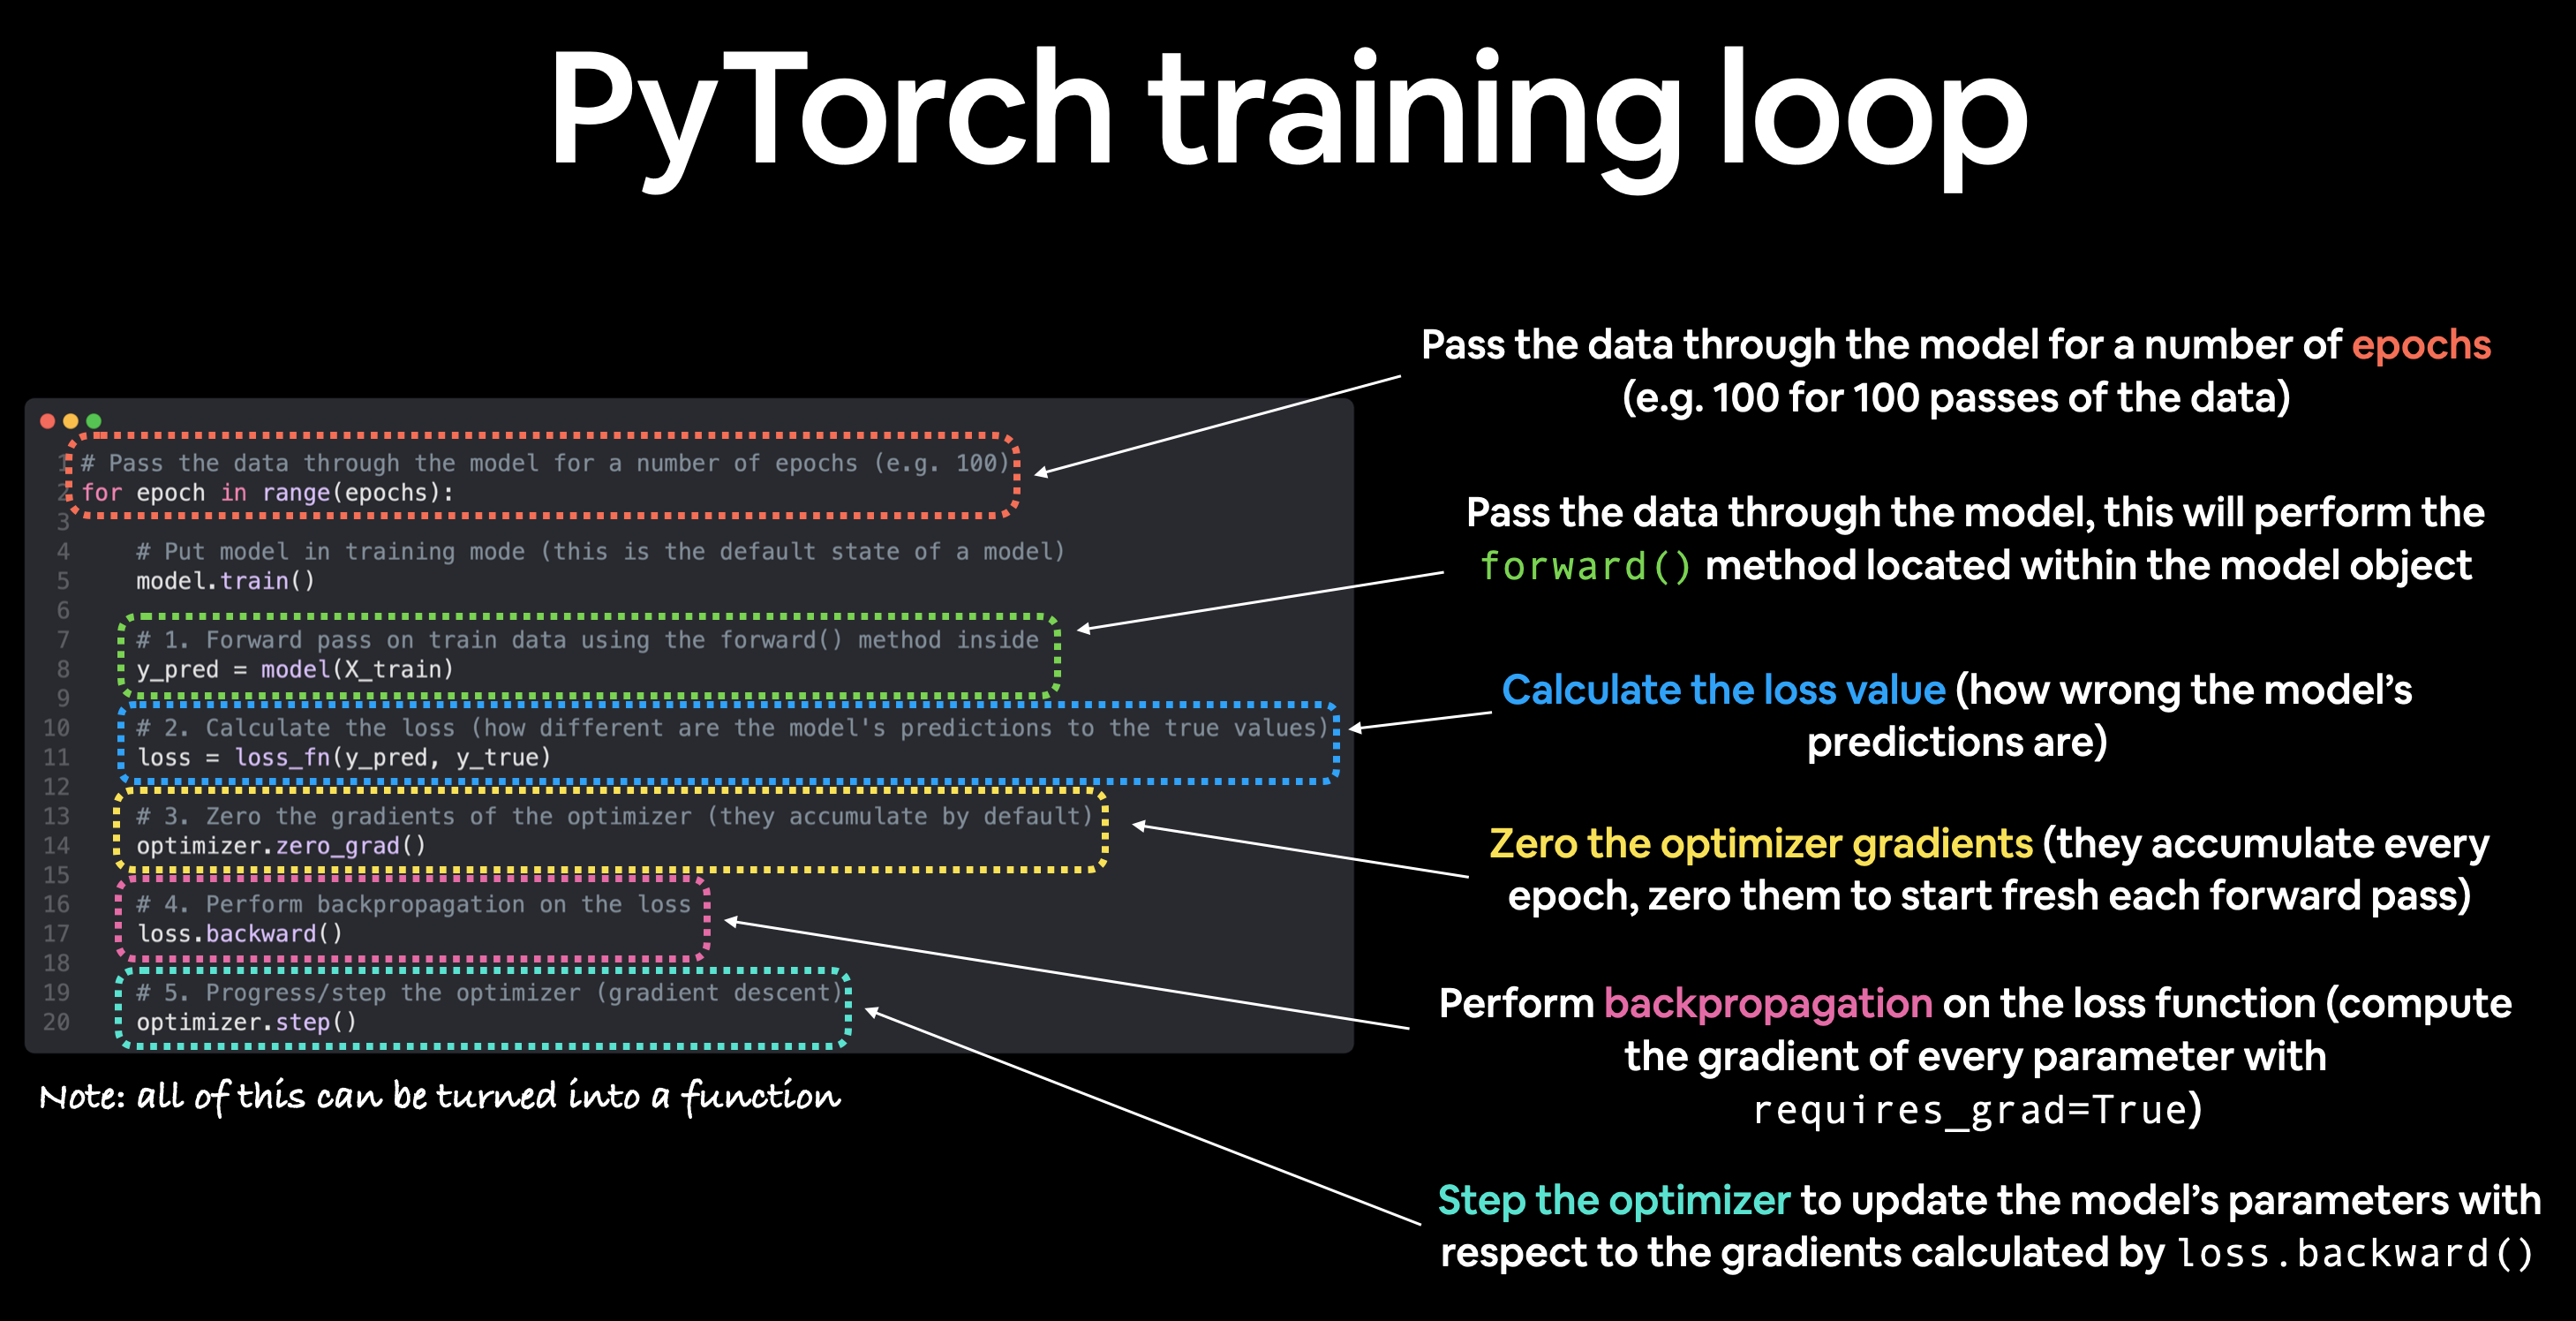

- Forward pass - The models looks at data for once performing `forward()` functions = `model_0(x_train)`
- Calculate loss - The model compare the predictiosn with reality = `loss(y_perd,x_train)`
- Zero gradient - The optimizer gradients are set to zero so that they can be recalculated for specific step = `optimizer.zero_grad()`
- Perform backprop - Backpropagation, calculate gradient w.r.t model parameters =`loss.backward()`
- Update optimizer - Update parameter with `requires_grad = True` = `optimizer.step()`

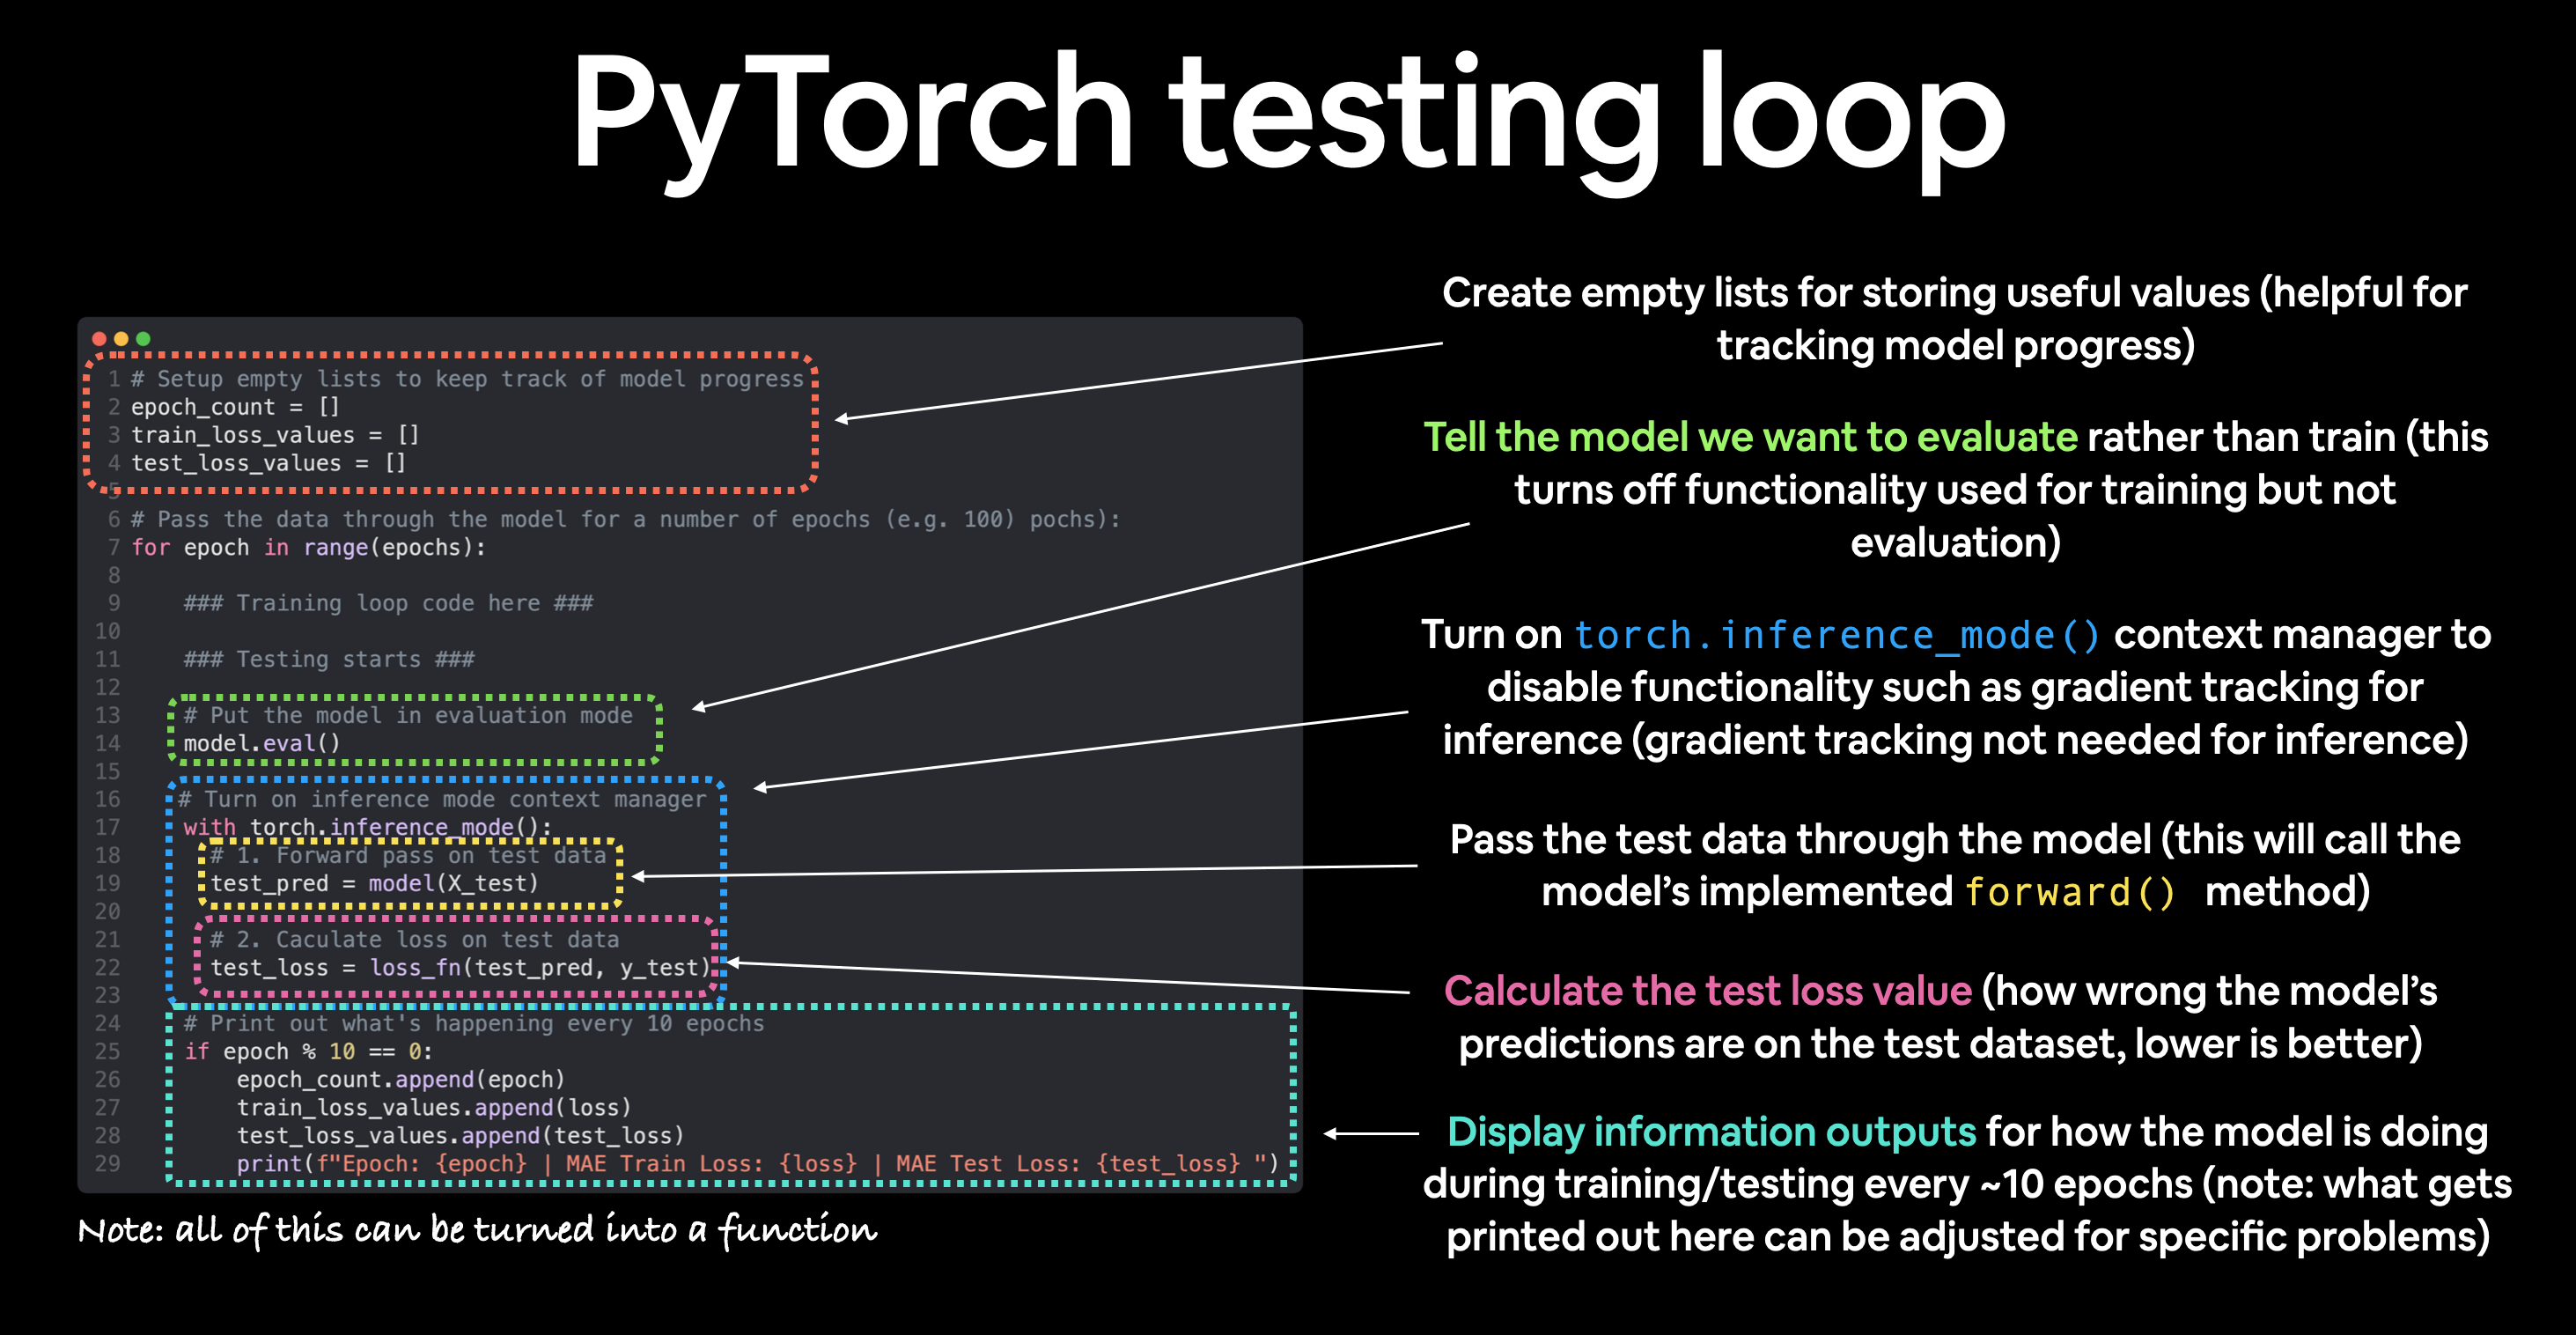

- almost the same thing but don't forget to detach gradient 

In [10]:
torch.manual_seed(43)

epochs =100

train_loss_value = []
test_loss_value = []
epoch_count = []

# training 
for epoch in range(epochs):

    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred,y_train.type(torch.float))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing 

    model_0.eval()

    with torch.inference_mode():

        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred,y_test.type(torch.float))

        if epoch % 10 == 0:

            epoch_count.append(epoch)
            train_loss_value.append(loss.detach().numpy())
            test_loss_value.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.1586150825023651 | MAE Test Loss: 0.2744242548942566 
Epoch: 10 | MAE Train Loss: 0.14709410071372986 | MAE Test Loss: 0.26095330715179443 
Epoch: 20 | MAE Train Loss: 0.1355731189250946 | MAE Test Loss: 0.24748241901397705 
Epoch: 30 | MAE Train Loss: 0.12405228614807129 | MAE Test Loss: 0.23401157557964325 
Epoch: 40 | MAE Train Loss: 0.11253144592046738 | MAE Test Loss: 0.22054079174995422 
Epoch: 50 | MAE Train Loss: 0.10101058334112167 | MAE Test Loss: 0.20706996321678162 
Epoch: 60 | MAE Train Loss: 0.08948975056409836 | MAE Test Loss: 0.1935991495847702 
Epoch: 70 | MAE Train Loss: 0.07820217311382294 | MAE Test Loss: 0.18027827143669128 
Epoch: 80 | MAE Train Loss: 0.06873634457588196 | MAE Test Loss: 0.1679723560810089 
Epoch: 90 | MAE Train Loss: 0.061134256422519684 | MAE Test Loss: 0.15682248771190643 


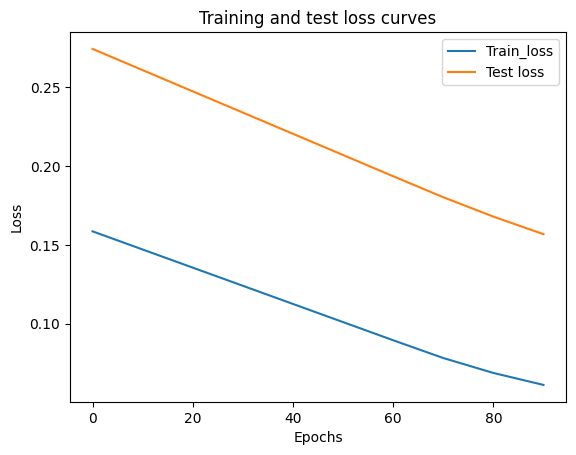

In [11]:
plt.plot(epoch_count,train_loss_value, label = "Train_loss")
plt.plot(epoch_count,test_loss_value, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Let's inspect our model's `.state_dict()` to see see how close our model gets to the original values we set for weights and bias.

In [12]:
print("model learned the following values:")
print(model_0.state_dict())
print("original weights and bias",weights ,"and",bias)

model learned the following values:
OrderedDict([('weight', tensor([0.5044])), ('bias', tensor([0.3263]))])
original weights and bias 0.7 and 0.3


**4. Making predictions with a trained PyTorch model (inference)**

Things to remember --

- Change the model to evaluation mode `model.eval()`
- Make the predictions with inference mode `torch.inference_mode()`
- All predictions and objects should be on same device (same GPU or CPU)

In [13]:
model_0.eval()

with torch.inference_mode():
    y_pred = model_0(X_test)
    print(y_pred)

tensor([[0.7299],
        [0.7399],
        [0.7500],
        [0.7601],
        [0.7702],
        [0.7803],
        [0.7904],
        [0.8005],
        [0.8106],
        [0.8207]])


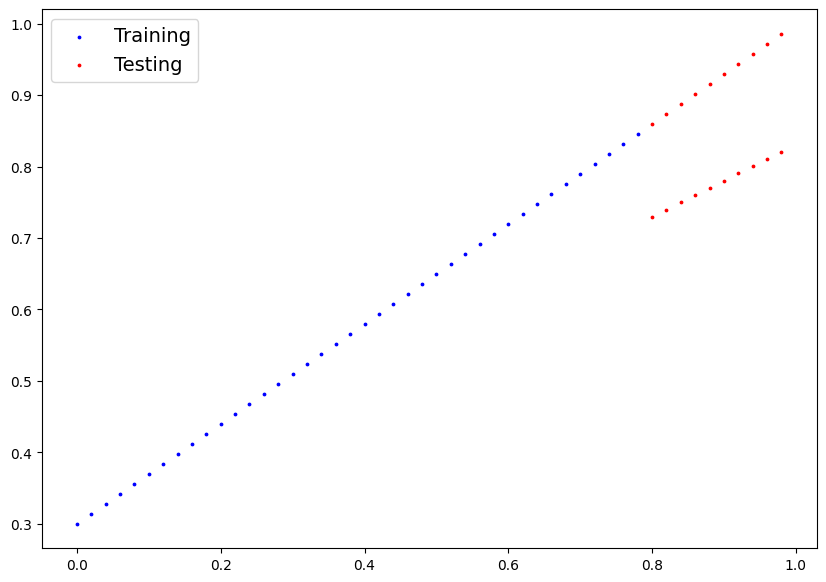

In [14]:
plot_predictions(predictions=y_pred)

**5. Saving and loading a PyTorch model**

3 functions to remember 

- `torch.save` - Saves a sterlized object to disk, pickle file

- `torch.load` - Used to load pickle file , desterlize it 

- `torch.nn.Module.load_state_dict` - Load a model parameter dictonary 

Only learnable paramters are saved(convolutional layers, linear layers, etc.) , `state_dict` is simply a python object and also registered buffers (batchnorm’s running_mean) are not registered. Optimizer objects also have `state_dict` contains information about the optimizer’s state, as well as the hyperparameters used.

In [15]:
PATH = r"B:\\Coding_Stuff\\PyTorch\\Udemy\\Models"
import os 

# A common PyTorch convention is to save models 
# using either a .pt or .pth file extension.

model_path = os.path.join(PATH, "model_01"+".pth")
torch.save(model_0.state_dict(), model_path)

In [16]:
# loading 

model_0 = Linear_Regression()
model_0.load_state_dict(torch.load(PATH + "\\model_01.pth"))
model_0.eval()

Linear_Regression()

Notice that the `load_state_dict()` function takes a dictionary object, NOT a path to a saved object. This means that you must deserialize the saved state_dict before you pass it to the `load_state_dict()` function. For example, you CANNOT load using `model.load_state_dict(PATH)`.

**Saving & Loading a General Checkpoint for Inference and/or Resuming Training**

In [17]:
torch.save({
    "epochs":epoch,
    "model_state_dict": model_0.state_dict(),
    "optimizer_state_dict":optimizer.state_dict(),
    "loss":loss
}, os.path.join(PATH, "model_01_checkpoint.pth"))

In [18]:
model = Linear_Regression()

checkpoint = torch.load(PATH + "\\model_01_checkpoint.pth")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epochs']
loss = checkpoint['loss']

model.eval()
# - or -
model.train()

Linear_Regression()

**Using Parameters from a Different Model**

`torch.save(modelA.state_dict(), PATH)`

`modelB = TheModelBClass(*args, **kwargs)`

`modelB.load_state_dict(torch.load(PATH), strict=False)`



**6. Putting it all together**

In [19]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 

In [20]:
# Set up device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Device :', device)

Device : cuda


In [21]:
# Data 
weights = 0.7 
bias = 0.3 

x = torch.arange(0,1, 0.02).unsqueeze(dim=1)
y = weights * x + bias
x[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [22]:
# Split data
train_split = int(0.8*len(x))
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]
len(x_test),len(y_test),len(x_train),len(y_train)

(10, 10, 40, 40)

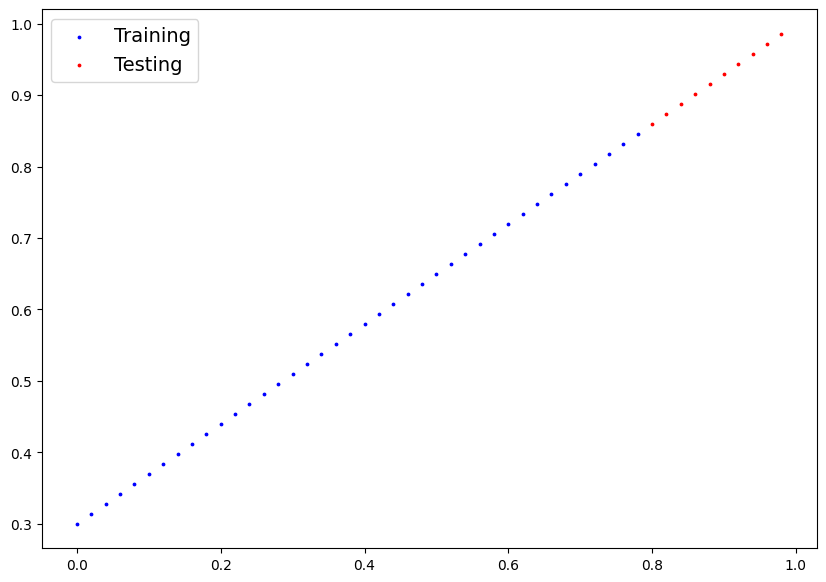

In [23]:
plot_predictions(x_train,x_test,y_train,y_test)

In [24]:
# Building a model

class Linear_RegressionV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
        
torch.manual_seed(45)
model_01v2 = Linear_RegressionV1()
model_01v2,model_01v2.state_dict()

(Linear_RegressionV1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.6261]])),
              ('linear_layer.bias', tensor([0.9227]))]))

In [25]:
# model to GPU
print(next(model_01v2.parameters()).device)
model_01v2.to(device)
print(next(model_01v2.parameters()).device)

cpu
cuda:0


In [26]:
# Training 

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr = 0.01, params = model_01v2.parameters())

torch.manual_seed(43)

x_test = x_test.to(0)
x_train = x_train.to(0)
y_train = y_train.to(0)
y_test = y_test.to(0)

for epoch in range(epochs):
    model_01v2.train()

    y_pred = model_01v2(x_train)
    y_pred.to(device)
    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model_01v2(x_test)
        test_pred.to(device)
        test_loss = loss_fn(test_pred,y_test)

    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.27570733428001404 | Test loss: 0.5585620403289795
Epoch: 10 | Train loss: 0.27055659890174866 | Test loss: 0.5670064687728882
Epoch: 20 | Train loss: 0.2664296627044678 | Test loss: 0.5698134303092957
Epoch: 30 | Train loss: 0.2623027265071869 | Test loss: 0.5726203918457031
Epoch: 40 | Train loss: 0.25831228494644165 | Test loss: 0.5733399391174316
Epoch: 50 | Train loss: 0.25478416681289673 | Test loss: 0.5691887140274048
Epoch: 60 | Train loss: 0.2512560486793518 | Test loss: 0.5650374293327332
Epoch: 70 | Train loss: 0.24772797524929047 | Test loss: 0.5608862042427063
Epoch: 80 | Train loss: 0.24419982731342316 | Test loss: 0.5567349791526794
Epoch: 90 | Train loss: 0.24067173898220062 | Test loss: 0.5525836944580078


**Making Predictions**

In [27]:
# Turn model into evaluation mode
model_01v2.eval()
X_test = X_test.to(device)

# Make predictions on the test data
with torch.inference_mode():
    y_pred = model_01v2(X_test)
print(y_pred)

tensor([[0.4171],
        [0.4076],
        [0.3980],
        [0.3885],
        [0.3789],
        [0.3694],
        [0.3598],
        [0.3503],
        [0.3407],
        [0.3312]], device='cuda:0')


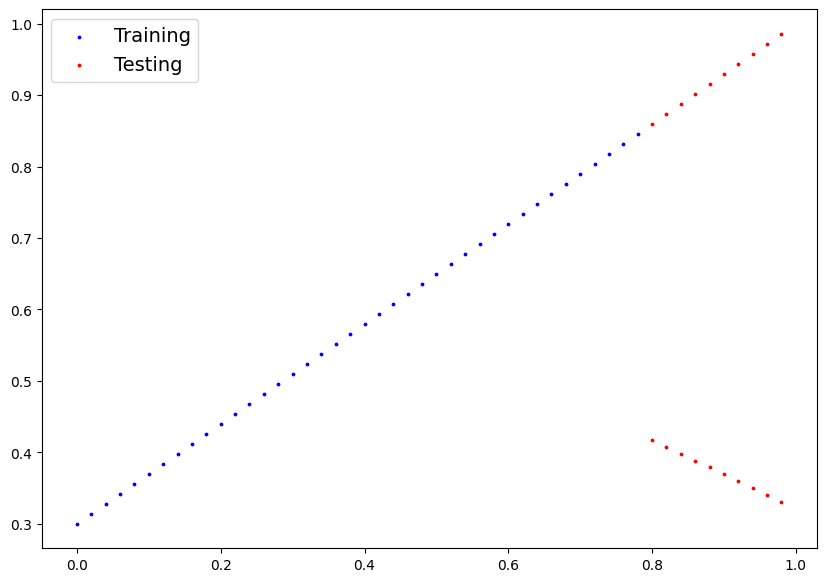

In [28]:
plot_predictions(predictions=y_pred.cpu())

**Saving and Loading Model**

In [29]:
MODEL_PATH = r"B:\\Coding_Stuff\\PyTorch\\Udemy\\Models"
MODEL_NAME = "\\model_01_v2.pth"
PATH = MODEL_PATH + MODEL_NAME
print("Saving model\n")
torch.save(obj= model_01v2.state_dict(),
           f = PATH)

Saving model



In [30]:
loaded_model = Linear_RegressionV1()
loaded_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Exercises and Extra Curriculum 

In [31]:
# 1.Create a straight line dataset using the linear regression formula (weight * X + bias).
import torch
x = torch.arange(0,10,0.1)
weight = 0.3
bias = 0.9
y = x*weight + bias 

In [32]:
split = int(len(x) * 0.8)
x_train,y_train = x[:split],y[:split]
x_test,y_test = x[split:],y[split:]

len(x_test),len(y_test),len(x_train),len(y_train)

(20, 20, 80, 80)

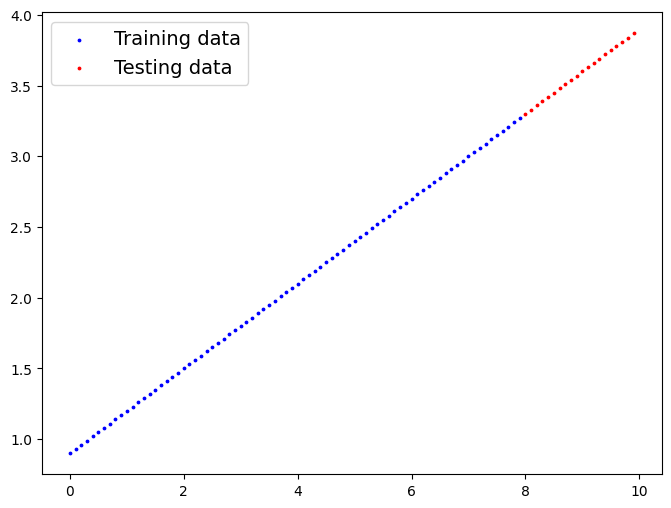

In [33]:
import matplotlib.pyplot as plt 

def plot_predictions(train_data=x_train,
                     train_label = y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):
    
    plt.figure(figsize=(8,6))
    plt.scatter(train_data,train_label, c="blue",s=3 , label="Training data")
    plt.scatter(test_data,test_label,c ="red",s=3,label="Testing data")
    plt.legend(prop = {"size":14});
    
    if predictions is not None:
        plt.scatter(predictions,test_label, c = "green", s=3)
        plt.legend(prop = {"size":14});
    

plot_predictions(x_train,y_train,x_test,y_test)

In [34]:
# 2.Build a PyTorch model by subclassing nn.Module.
import torch.nn as nn 
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                           dtype = float,
                                           requires_grad = True))
        
        self.bias = nn.Parameter(torch.randn(1,
                                        dtype = float,
                                        requires_grad = True))

    def forward(self,x):
        return self.weights*x + self.bias 

In [35]:
model = NeuralNet()
model.state_dict()

OrderedDict([('weights', tensor([-0.4324], dtype=torch.float64)),
             ('bias', tensor([0.4705], dtype=torch.float64))])

In [36]:
optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.001)
loss_fn = nn.L1Loss()

for epoch in range(300):

    model.train()

    y_pred = model(x_train)
    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 20 == 0:
        print("Train loss :",loss.item()," Test loss :",test_loss.item())


Train loss : 3.322543524483769  Test loss : 6.94832655306247
Train loss : 2.990493525028221  Test loss : 6.221276546145259
Train loss : 2.6584435255726726  Test loss : 5.494226539228048
Train loss : 2.326393526117125  Test loss : 4.767176532310837
Train loss : 1.9943435266615765  Test loss : 4.040126525393626
Train loss : 1.662293527206027  Test loss : 3.3130765184764144
Train loss : 1.3302435277504785  Test loss : 2.5860265115592016
Train loss : 0.998193528294929  Test loss : 1.8589765046419888
Train loss : 0.6661435288393809  Test loss : 1.131926497724778
Train loss : 0.3340935293838326  Test loss : 0.404876490807567
Train loss : 0.09717868610068975  Test loss : 0.12703414183682069
Train loss : 0.09343139092925416  Test loss : 0.1338152765313724
Train loss : 0.09004739112148681  Test loss : 0.1290272863611065
Train loss : 0.08666339131371945  Test loss : 0.12423929619084051
Train loss : 0.0832793915059521  Test loss : 0.11945130602057456


In [37]:
path = r"B:\\Coding_Stuff\\PyTorch\\Udemy\\Models\\Exercise1.pth"
torch.save(obj = model.state_dict(), f = path)

# New instance 
new_model = NeuralNet()
new_model.load_state_dict(torch.load(path))
new_model.eval()

NeuralNet()

In [38]:
with torch.inference_mode():
    print(new_model(x))

tensor([0.7088, 0.7422, 0.7757, 0.8091, 0.8425, 0.8759, 0.9094, 0.9428, 0.9762,
        1.0096, 1.0430, 1.0765, 1.1099, 1.1433, 1.1767, 1.2102, 1.2436, 1.2770,
        1.3104, 1.3439, 1.3773, 1.4107, 1.4441, 1.4775, 1.5110, 1.5444, 1.5778,
        1.6112, 1.6447, 1.6781, 1.7115, 1.7449, 1.7783, 1.8118, 1.8452, 1.8786,
        1.9120, 1.9455, 1.9789, 2.0123, 2.0457, 2.0792, 2.1126, 2.1460, 2.1794,
        2.2128, 2.2463, 2.2797, 2.3131, 2.3465, 2.3800, 2.4134, 2.4468, 2.4802,
        2.5136, 2.5471, 2.5805, 2.6139, 2.6473, 2.6808, 2.7142, 2.7476, 2.7810,
        2.8145, 2.8479, 2.8813, 2.9147, 2.9481, 2.9816, 3.0150, 3.0484, 3.0818,
        3.1153, 3.1487, 3.1821, 3.2155, 3.2490, 3.2824, 3.3158, 3.3492, 3.3826,
        3.4161, 3.4495, 3.4829, 3.5163, 3.5498, 3.5832, 3.6166, 3.6500, 3.6834,
        3.7169, 3.7503, 3.7837, 3.8171, 3.8506, 3.8840, 3.9174, 3.9508, 3.9843,
        4.0177], dtype=torch.float64)


## Extra Curriculum

- TensorDataset - Dataset wrapping tensors. 

- DataLoader - PyTorch’s DataLoader is responsible for managing batches

- saving the model

In [39]:
from torch.utils.data import TensorDataset
import torch
import numpy as np 
 
x_train = torch.arange(10)
y_train = torch.arange(10)

train_ds = TensorDataset(x_train,y_train)
print(train_ds)

In [40]:
from torch.utils.data import DataLoader
traindl = DataLoader(train_ds,batch_size=21)
traindl

**Note**

If you only plan to keep the best performing model (according to the acquired validation loss), don’t forget that `best_model_state = model.state_dict()` returns a reference to the state and not its copy! You must serialize `best_model_state` or `use best_model_state = deepcopy(model.state_dict())` otherwise your best best_model_state will keep getting updated by the subsequent training iterations. As a result, the final model state will be the state of the overfitted model.

Remember that you must call `model.eval()` to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

**Saving and loading on device**

In [ ]:
device = torch.device('cpu') # torch.device('cuda')
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))